In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")

In [3]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  float64
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Data Wrangling & Cleaning

1. Menghandle kolom yg tidak dibutuhkan

In [5]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [6]:
df = df.drop(columns=['Unnamed: 0'])
# Menghapus kolom Unnamed: 0, karena kolom ini tidak dibutuhkan

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


2. Menghandle kolom yang missing atau Nan

In [8]:
df.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [9]:
df[(df['name'].isna()) | (df['host_name'].isna())]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768.0,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818.0,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018.0,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415.0,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144.0,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742.0,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,5/13/2017,0.07,1,365,0
1594,10710165.0,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743.0,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,12/11/2017,0.03,3,220,0
3571,19682464.0,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,7/29/2017,0.02,1,365,0


In [10]:
df = df[(~df['name'].isna()) & (~df['host_name'].isna())]

#Menghapus value yang kosong dari kolom name dan host_name karena jumlah yang tidak signifikasn yaitu hanya berjumlah 9

In [11]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [12]:
df[(df['last_review'].isna()) | (df['number_of_reviews'].isna())]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,2.797900e+04,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2.874500e+04,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,9.418650e+05,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1.738669e+06,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,9.592540e+05,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,7.904750e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,7.904750e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,7.904760e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [13]:
# Mengubah value Nan pada kolom review per month menjadi 0
df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\Atik Dharma\AppData\Local\Temp\ipykernel_1800\3421840204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [17]:
# Mengubah kolom last_review menjadi format datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Mengisi missing value pda kolom last_review dengan timestamp 1997-01-01
df['last_review'].fillna(pd.Timestamp('1997-01-01'), inplace=True)

C:\Users\Atik Dharma\AppData\Local\Temp\ipykernel_1800\3752959033.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(pd.Timestamp('1997-01-01'), inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  float64       
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  int64         
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

In [19]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

3. Menghandle Duplicate Data

In [20]:
df.duplicated().sum()

# Tidak ada Data yg terduplikasi

0

4. Cek data yang memiliki price 0

In [21]:
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108.0,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,1997-01-01,0.0,1,0,0


In [22]:
df[df['price']!=0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2.793400e+04,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,2.797900e+04,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,1997-01-01,0.00,2,358,0
2,2.874500e+04,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,1997-01-01,0.00,1,365,0
3,3.578000e+04,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,9.418650e+05,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,1997-01-01,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,7.904650e+17,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,1997-01-01,0.00,1,362,0
15850,7.904750e+17,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,1997-01-01,0.00,14,365,0
15851,7.904750e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,1997-01-01,0.00,14,365,0
15852,7.904760e+17,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,1997-01-01,0.00,14,365,0


In [23]:
df = df[df['price']!=0]
#Menghapus data yg memiliki price sama dengan 0

In [24]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1997-01-01,0.00,2,358,0
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1997-01-01,0.00,1,365,0
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1997-01-01,0.00,3,365,0


Data Analysis & Data Visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15844 non-null  float64       
 1   name                            15844 non-null  object        
 2   host_id                         15844 non-null  int64         
 3   host_name                       15844 non-null  object        
 4   neighbourhood                   15844 non-null  object        
 5   latitude                        15844 non-null  float64       
 6   longitude                       15844 non-null  float64       
 7   room_type                       15844 non-null  object        
 8   price                           15844 non-null  int64         
 9   minimum_nights                  15844 non-null  int64         
 10  number_of_reviews               15844 non-null  int64         
 11  last_re

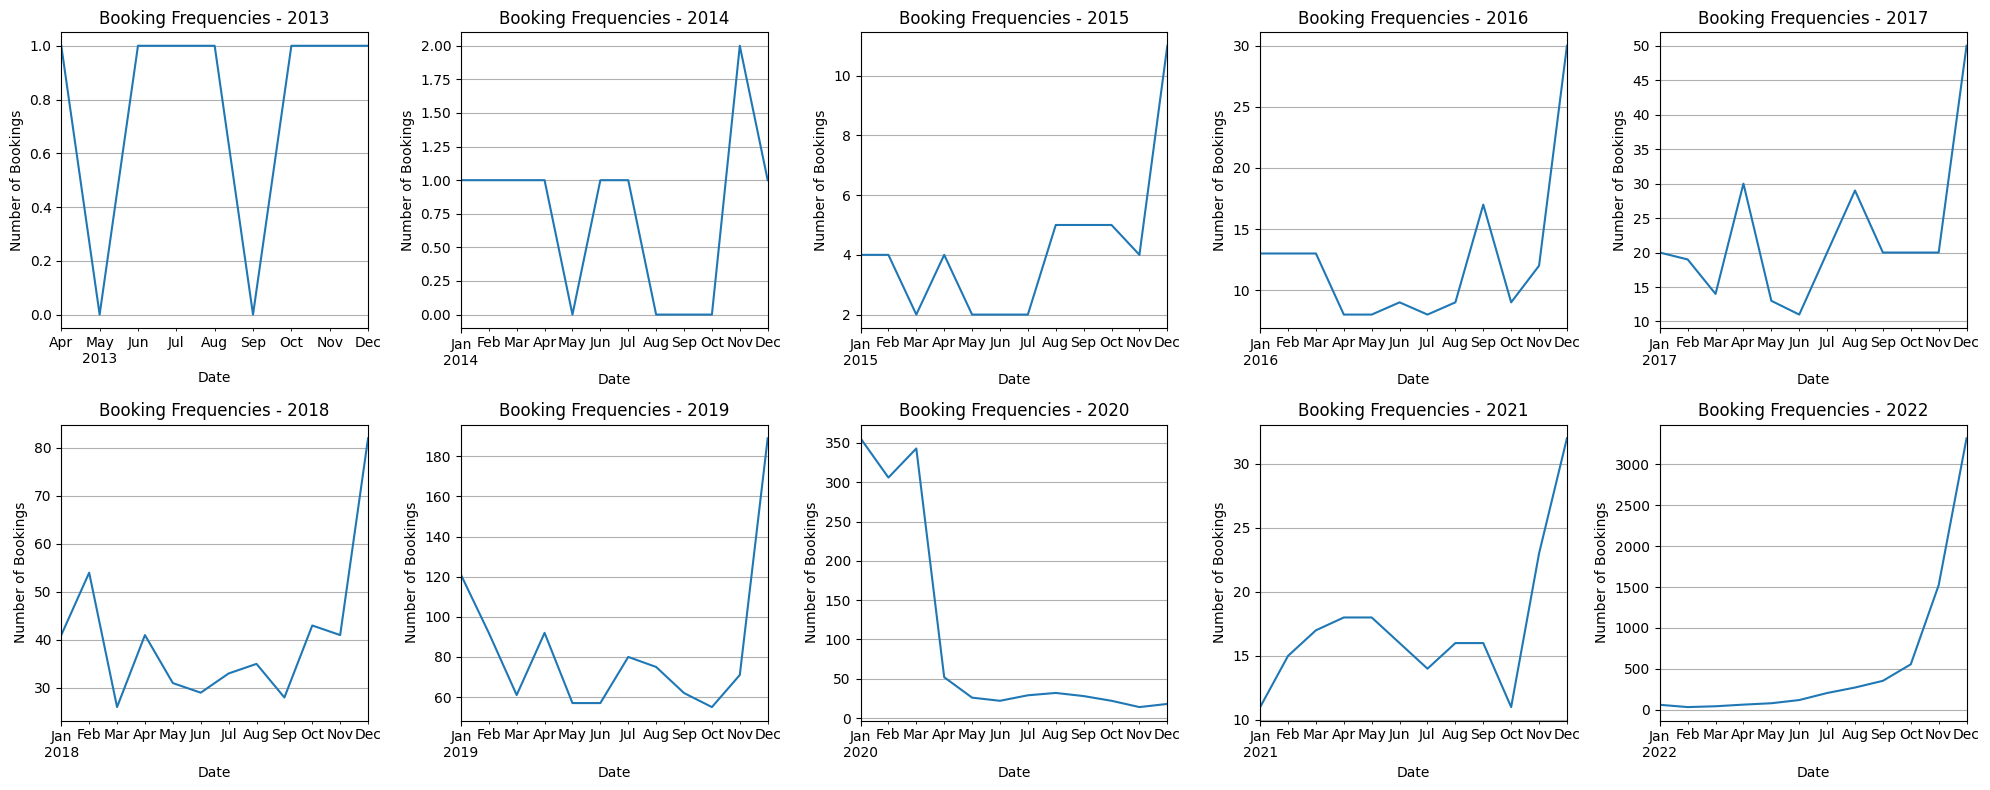

In [29]:
df_copy2 = df.copy()  # Create a copy of the original DataFrame

# Convert 'last_review' column to datetime format in the copied DataFrame
df_copy2['last_review'] = pd.to_datetime(df_copy2['last_review'], errors='coerce')

# Filter out records with 'last_review' between 2013 and 2022 in the copied DataFrame
df_filtered2 = df_copy2[(df_copy2['last_review'].dt.year >= 2013) & (df_copy2['last_review'].dt.year <= 2022)]

# Create subplots for each year
years = range(2013, 2023)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, year in enumerate(years):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    bookings_over_time = df_filtered2[df_filtered2['last_review'].dt.year == year].resample('M', on='last_review').size()  # Resample monthly
    bookings_over_time.plot(ax=ax, title=f'Booking Frequencies - {year}', legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Bookings')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [30]:
# Create an empty list to store the number of bookings per month
booking_data = []

# Iterate through each year and month to count bookings
for year in range(2013, 2023):
    for month in range(1, 13):  # Iterate through months (1 to 12)
        bookings_per_month = df_filtered2[
            (df_filtered2['last_review'].dt.year == year) & 
            (df_filtered2['last_review'].dt.month == month)
        ].shape[0]  # Count bookings for the specific year and month
        
        # Append data to the list
        booking_data.append({
            'Year': year,
            'Month': month,
            'Number_of_Bookings': bookings_per_month
        })

# Create a DataFrame from the collected data
booking_counts = pd.DataFrame(booking_data)

# Display the DataFrame containing the number of bookings per month
display(booking_counts[booking_counts['Year']==2020],booking_counts[booking_counts['Year']==2021],booking_counts[booking_counts['Year']==2022])

,Year,Month,Number_of_Bookings
84,2020,1,356
85,2020,2,306
86,2020,3,343
87,2020,4,52
88,2020,5,26
89,2020,6,22
90,2020,7,29
91,2020,8,32
92,2020,9,28
93,2020,10,22


,Year,Month,Number_of_Bookings
96,2021,1,11
97,2021,2,15
98,2021,3,17
99,2021,4,18
100,2021,5,18
101,2021,6,16
102,2021,7,14
103,2021,8,16
104,2021,9,16
105,2021,10,11


,Year,Month,Number_of_Bookings
108,2022,1,61
109,2022,2,33
110,2022,3,43
111,2022,4,63
112,2022,5,80
113,2022,6,119
114,2022,7,205
115,2022,8,272
116,2022,9,354
117,2022,10,556


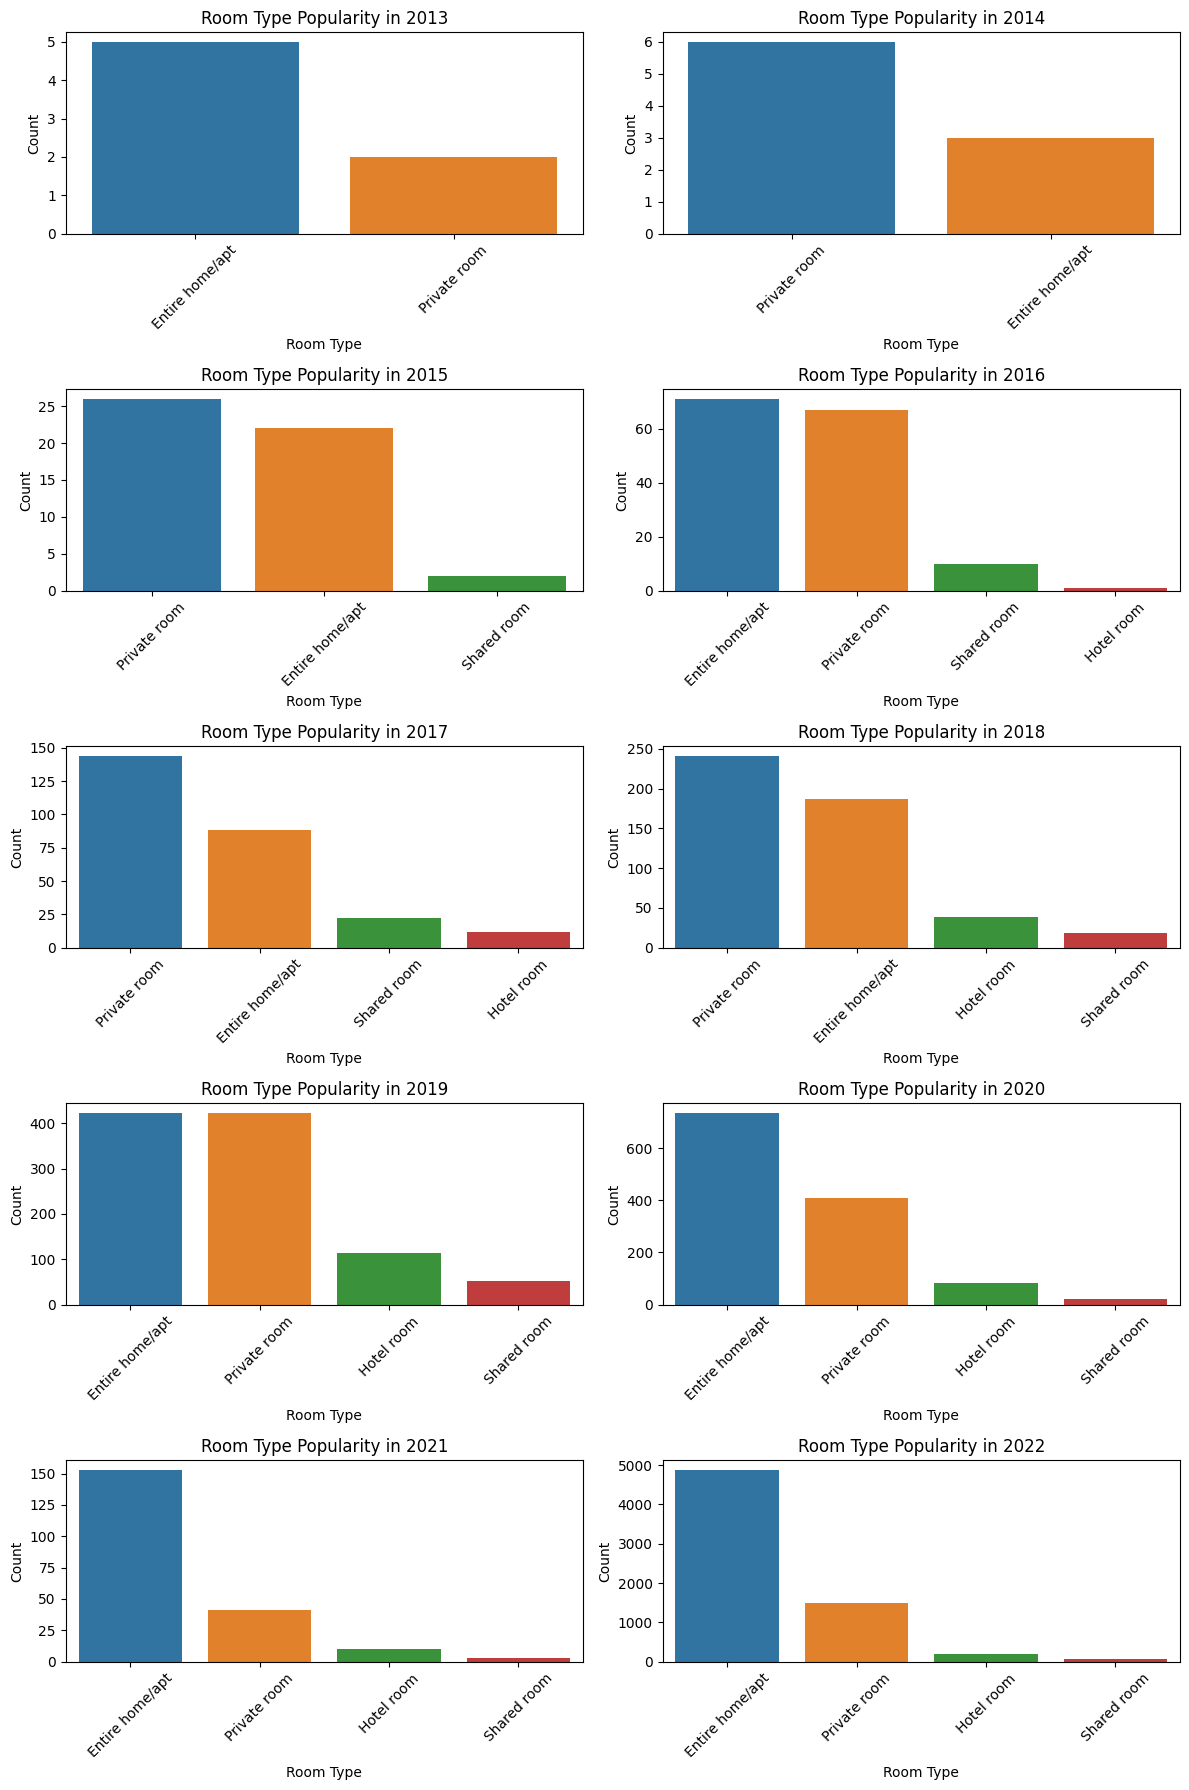

In [31]:
years = range(2013, 2023)
num_rows = 5
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 18))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    
    # Filter data for the current year
    df_year = df[df['last_review'].dt.year == year]
    
    # Calculate room type counts for the current year
    room_type_counts = df_year['room_type'].value_counts()
    
    ax = axes[row, col]
    sns.barplot(x=room_type_counts.index, y=room_type_counts.values, hue=room_type_counts.index, ax=ax)
    ax.set_title(f'Room Type Popularity in {year}')
    ax.set_xlabel('Room Type')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-labels for better readability

plt.tight_layout()
plt.show()

Uji Distribusi Data

In [32]:
from scipy.stats import kstest

In [33]:
# Kolom Price

stats, pvalue = kstest(df['price'], 'norm')
stats, pvalue

if pvalue >= 0.05:
    #Ho

    print(f'pvalue= {pvalue}, pvalue>= 0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal')
else:
    #Ha
    print(f'pvalue= {pvalue}, pvalue< 0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal')

pvalue= 0.0, pvalue< 0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal


1. Harga setiap tipe kamar

In [34]:
# Mencari harga terendah dan tertinggi
max_price = df['price'].max()
min_price = df[df['price'] > 0]['price'].min()
print(f'Maximum price = {max_price}')
print(f'Minimum price = {min_price}')

Maximum price = 1100000
Minimum price = 278


In [35]:
from scipy.stats import iqr

In [36]:
q3 = df['price'].describe()['75%']
print(f'Q3 value = {q3}')
q1 = df['price'].describe()['25%']
print(f'Q1 value = {q1}')
upperbound = q3 + (iqr(df['price'])*1.5)
print(f'Upper bound value= {upperbound}')
lowerbound = q1 - (iqr(df['price'])*1.5)
print(f'Lower bound value= {lowerbound}')

Q3 value = 2430.25
Q1 value = 900.0
Upper bound value= 4725.625
Lower bound value= -1395.375


In [37]:
outliers = len(df[df['price'] > upperbound])
total = len(df)
print(outliers/total)

0.08842464024236305


In [38]:
# Karena terdapat perbedaan yang sangat jauh maka akan dibagi menjadi 2 plot yaitu:
# A) 0 - 5000
# B) > 5000 

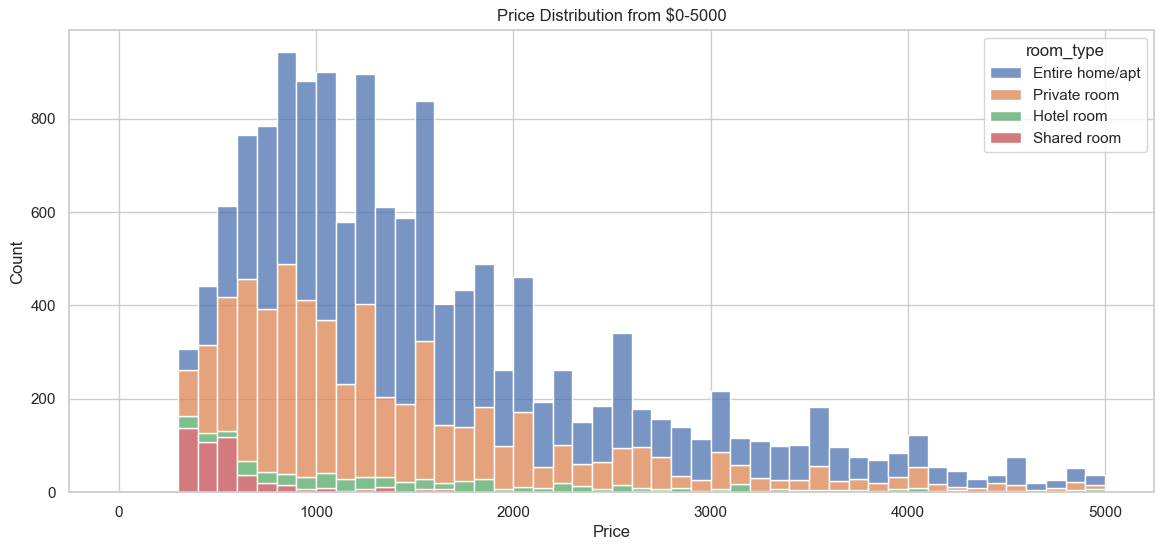

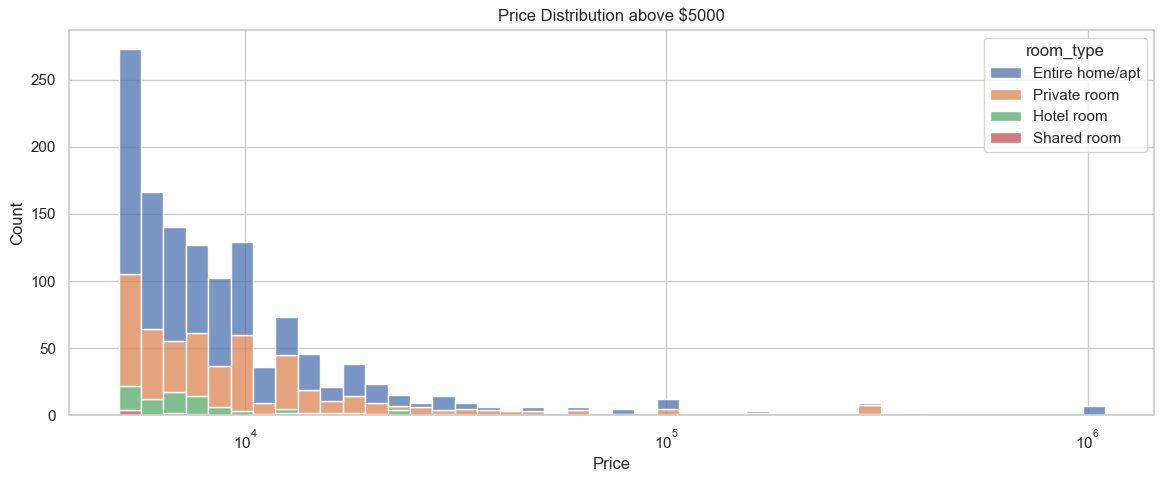

In [39]:
bins_low = np.arange(0, 5001, 100)
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14,6))
sns.histplot(data=df[df['price'] < 5000], x='price', bins=bins_low, hue='room_type', 
             hue_order=['Entire home/apt','Private room','Hotel room','Shared room'], multiple='stack');
plt.title(f'Price Distribution from $0-5000')
plt.xlabel('Price')

plt.figure(figsize=(14,5))
sns.histplot(data=df[df['price'] >= 5000], x='price', hue='room_type',
             hue_order=['Entire home/apt','Private room','Hotel room','Shared room'], multiple='stack', log_scale=True);
plt.title('Price Distribution above $5000')
plt.xlabel('Price');

In [40]:
df_no_price_outlier = df[df['price'] <= 11000]
df_no_price_outlier.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1997-01-01,0.00,2,358,0
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1997-01-01,0.00,1,365,0
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1997-01-01,0.00,3,365,0


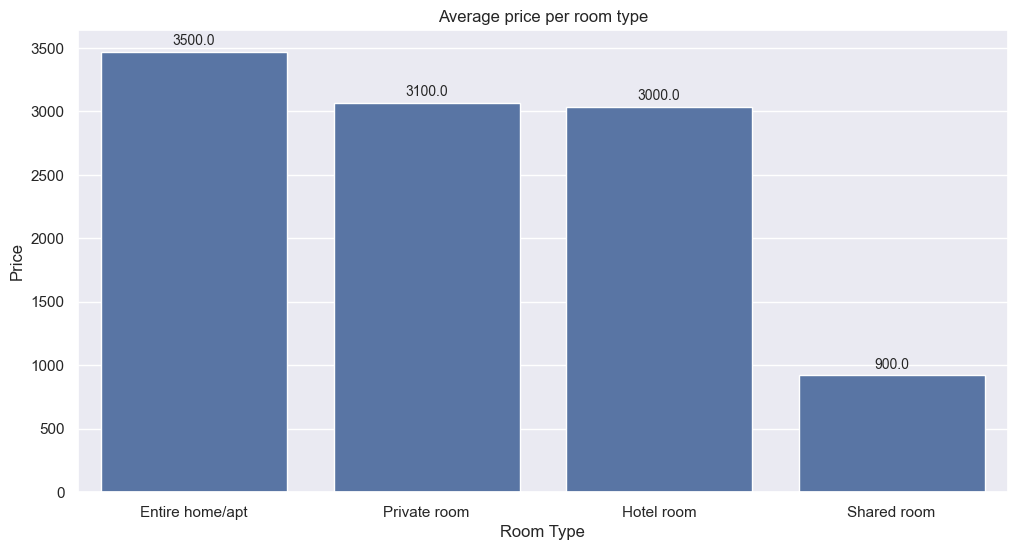

In [41]:
plt.figure(figsize=(12,6));
sns.set_theme()
ax = sns.barplot(data=df,
            x='room_type',
            y='price',
            estimator=np.mean,
            ci=0);
for bar in ax.patches:
    ax.annotate(format(round(bar.get_height(), -2)),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Average price per room type');

C:\Users\Atik Dharma\AppData\Local\Temp\ipykernel_12332\4094379057.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=df_no_price_outlier,


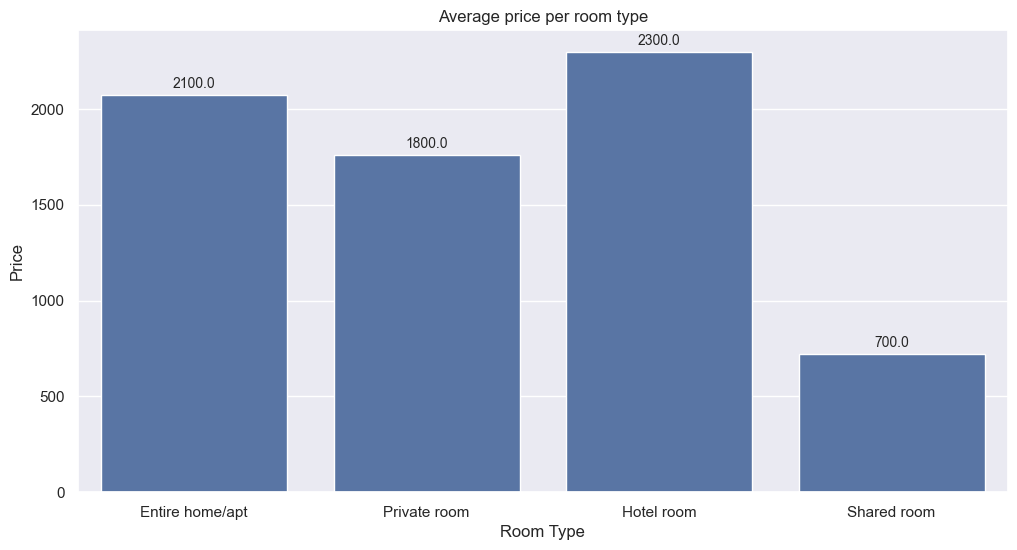

In [36]:
plt.figure(figsize=(12,6));
sns.set_theme()
ax = sns.barplot(data=df_no_price_outlier,
            x='room_type',
            y='price',
            estimator=np.mean,
            ci=0);
for bar in ax.patches:
    ax.annotate(format(round(bar.get_height(), -2)),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Average price per room type');

2. Harga setiap Neighborhood

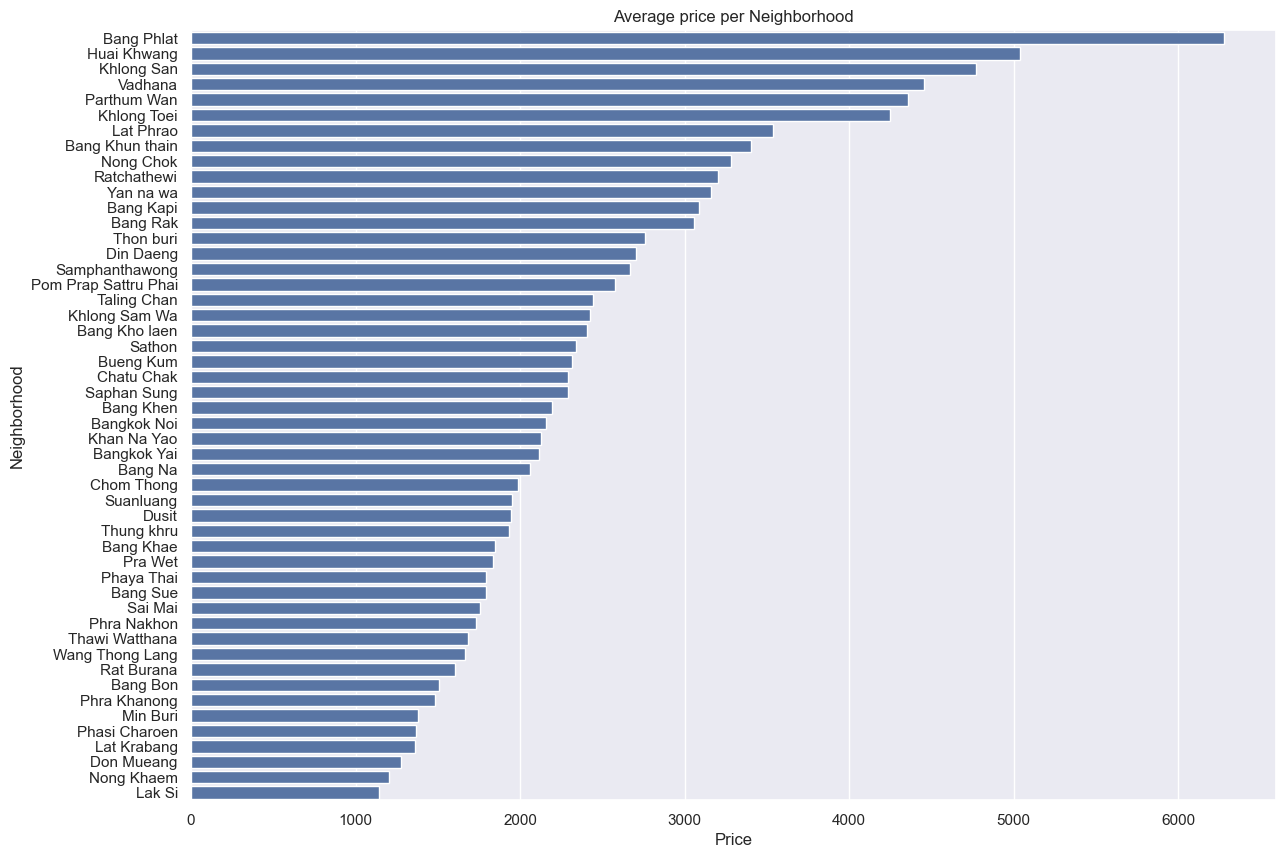

In [42]:
df_neighborhood = df.groupby('neighbourhood')[['price']].mean().sort_values(by='price',ascending=False).reset_index()
plt.figure(figsize=(14,10))
sns.barplot(data=df_neighborhood, y='neighbourhood', x='price', ci=0)
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.title('Average price per Neighborhood');